### Here We are calculating the Balanced accuracy score for each class in DAA (34) Classes

34 classes: closing_bottle , closing_door_inside ---> writing

For class 1: closing_bottle , Class Index :0

* True positive: Sick people correctly identified as sick -> Person closing_bottle in the picture is classified as closing_bottle action.
* False positive: Healthy people incorrectly identified as sick -> Person not closing_bottle in the picture is classified as closing_bottle action.
* True negative: Healthy people correctly identified as healthy -> Person not closing_bottle in the picture is classified as not closing_bottle action.
* False negative: Sick people incorrectly identified as healthy -> Person closing_bottle in the picture is classified as not closing_bottle action.

In terms of Class_index 0: 
* True positive: Class 0 in the picture is classified as class 0.
* False positive: Class other than 0 in the picture is classified as class 0.
* True negative: Class other than 0 suppose 1, in the picture is classified as class as 1.
* False negative: Class 0 in the picture is classified as class other than 0.

In [1]:
!nvidia-smi

Tue Apr  2 18:28:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.113.01             Driver Version: 535.113.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:3B:00.0 Off |                  Off |
| 30%   31C    P8              21W / 300W |      7MiB / 49140MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import socket
def find_free_port():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind(("",0))
        s.listen(1)
        port = s.getsockname()[1]
        return port

print(find_free_port())

40979


In [1]:
import os
os.cpu_count()

80

In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU device:',torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('No GPU avaialable, Using CPU')

torch.cuda.set_device(3)

GPU device: NVIDIA RTX A6000


In [6]:
scaler = torch.empty(1024)
scaler.shape

torch.Size([1024])

In [9]:
empty = torch.tensor([], dtype=torch.long)
empty

tensor([], dtype=torch.int64)

In [10]:
filler = torch.randn(1024)
filled = torch.cat((empty,filler))
filled.shape

torch.Size([1024])

In [11]:
filler_2 = torch.randn(1024)
filled_2 = torch.cat((filled,filler_2))
filled_2.shape

torch.Size([2048])

In [12]:
filled_2

tensor([ 0.5427,  1.6302, -0.2628,  ...,  0.0782, -0.5563,  0.7109])

In [4]:
input = torch.empty(3, 3)
torch.zeros_like(input)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [5]:
y_pred_all_gathered = [torch.zeros_like(input) for _ in range(2)]
print(f"The shape of the first element of the gathered prediction tensor: {y_pred_all_gathered[0].shape}")
print(f"The shape of the second element of the gathered prediction tensor: {y_pred_all_gathered[1].shape}")

The shape of the first element of the gathered prediction tensor: torch.Size([3, 3])
The shape of the second element of the gathered prediction tensor: torch.Size([3, 3])


In [13]:
y_pred_all_gathered

[tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]])]

# Metrics for : multiclass classification,
In multiclass classification, you have more than two classes, and each class has its own set of predictions and ground truth labels. To calculate metrics like accuracy, precision, recall, and F1-score, which are typically designed for binary classification, you need to extend these metrics to handle multiple classes. This is where different averaging methods come into play.

* Macro Average:

The macro average calculates the metric independently for each class and then takes the average across all classes.
It treats all classes equally, regardless of their support (number of samples in each class).
Useful when you want to evaluate the model's performance across all classes equally and give each class the same importance.
The formula for macro average is: sum of class metric scores / number of classes.

* Micro Average:

The micro average aggregates the contributions of all classes to calculate the metric.
It's suitable when you want to give equal weight to each prediction, regardless of class, and evaluate the overall performance of the model.
Micro averaging essentially treats the entire multiclass problem as a binary problem by considering all predictions and ground truth labels together.
The formula for micro average depends on the metric but generally involves aggregating true positives, false positives, false negatives, etc., across all classes.

* Weighted Average:

The weighted average takes the same approach as the macro average, but it considers class support (number of samples in each class) during averaging.
It gives more weight to classes with higher support, reflecting their importance in the dataset.
This is useful when you want to balance the influence of classes with different numbers of samples.
The formula for weighted average is: sum of (class metric score * class support) / total support.

* In summary:

* Macro Average treats all classes equally, useful when you want a balanced evaluation across all classes.
* Micro Average treats all predictions equally, giving more importance to overall performance, often used for imbalanced datasets.
* Weighted Average gives more importance to classes with higher support, providing a balance between macro and micro averages.

In [5]:
import json
import numpy as np

# 'file_path' : the actual path to your JSON file
file_path = "/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/src/components/experiments/Fourth_SGD/accumulated_pred_gt/train_data_bal_acc.json"

# Load the JSON file
with open(file_path, 'r') as json_file:
    lines = json_file.readlines()

# Initialize lists to store the extracted information
epochs = []
predictions = []
labels = []

# Iterate through each line in the JSON file
for line in lines:
    epoch_data = json.loads(line)

    # Extract the data from the dictionary
    epoch = epoch_data["epoch"]
    prediction_data = np.array(epoch_data["predictions"])
    label_data = np.array(epoch_data["labels"])

    # Append the extracted data to the lists
    epochs.append(epoch)
    predictions.append(prediction_data)
    labels.append(label_data)



In [4]:
# Calculate and display the information
for i in range(len(epochs)):
    print(f"Epoch {epochs[i]}:")
    print(f"Number of elements in predictions: {len(predictions[i])}")
    print(f"Number of elements in labels: {len(labels[i])}")
    print(f"Data type of elements in predictions: {predictions[i].dtype}")
    print(f"Data type of elements in labels: {labels[i].dtype}")
    print("=" * 40)

Epoch 0:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of elements in labels: int64
Epoch 1:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of elements in labels: int64
Epoch 2:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of elements in labels: int64
Epoch 3:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of elements in labels: int64
Epoch 4:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of elements in labels: int64
Epoch 5:
Number of elements in predictions: 259865
Number of elements in labels: 259865
Data type of elements in predictions: int64
Data type of 

In [5]:
# Find the index of the 29th epoch (assuming epochs are 0-indexed)
# Should throw an error for a value of epoch_to_find = 30, to ensure that you are 
# using the 30th epoch (0->29: 30)
# Updating the epoch for 90th epoch
epoch_to_find = 88
epoch_index = epochs.index(epoch_to_find)

# Extract predictions and labels for the 29th epoch
predictions_89 = predictions[epoch_index]
labels_89 = labels[epoch_index]


In [6]:
predictions_89

array([17, 18,  9, ..., 25, 25, 17])

In [6]:
predicted_labels = predictions_89
true_labels = labels_89

In [7]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_true= true_labels,y_pred= predicted_labels)

0.6164286414263804

In [8]:
def calculate_balanced_accuracy_two(y_pred_labels, y_true, num_classes):
    correct_per_class = torch.zeros(num_classes, device=y_pred_labels.device)
    total_per_class = torch.zeros(num_classes, device=y_pred_labels.device)

    for c in range(num_classes):
        correct = ((y_pred_labels == y_true) & (y_true == c)).sum()
        total = (y_true == c).sum()
        correct_per_class[c] = correct
        total_per_class[c] = total

    # Avoid division by zero
    per_class_accuracy = correct_per_class / total_per_class.clamp(min=1)
    
    balanced_accuracy = per_class_accuracy.mean().item()  # Convert to Python scalar
    return balanced_accuracy


In [9]:
predicted_labels = torch.tensor(predictions_89).to(device)
true_labels = torch.tensor(labels_89).to(device)
calculate_balanced_accuracy_two(predicted_labels, true_labels, 34)

0.6164286732673645

In [10]:
def calculate_balanced_accuracy(y_pred, y_true, num_classes, epsilon=1e-9):
    """
    Calculates the balanced accuracy score.
    
    Args:
        y_pred (torch.Tensor): Predicted labels.
        y_true (torch.Tensor): True labels.
        num_classes (int): Number of classes in the dataset.
        epsilon (float): A small value to add to denominators to prevent division by zero.
        
    Returns:
        float: Balanced accuracy score.
    """
    # Create confusion matrix
    confusion_matrix = torch.zeros(num_classes, num_classes, device=y_pred.device)
    for t, p in zip(y_true.view(-1), y_pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # Calculate recall for each class, adding epsilon to avoid division by zero
    recall = torch.diag(confusion_matrix) / (confusion_matrix.sum(1) + epsilon)

    # Calculate balanced accuracy
    balanced_accuracy = recall.mean().item()

    return balanced_accuracy

In [11]:
calculate_balanced_accuracy(predicted_labels, true_labels, 34)

0.6164286732673645

In [13]:
def calculate_balanced_accuracy_opt(y_pred_labels, y_true, num_classes):
    """
    Calculates the balanced accuracy score using PyTorch operations.

    Args:
        y_pred_labels (torch.Tensor): Tensor of predicted class labels.
        y_true (torch.Tensor): Tensor of true class labels.
        num_classes (int): Number of classes.

    Returns:
        float: The balanced accuracy score.
    """
    correct_per_class = torch.zeros(num_classes, device=y_pred_labels.device)
    total_per_class = torch.zeros(num_classes, device=y_pred_labels.device)

    for c in range(num_classes):
        true_positives = ((y_pred_labels == c) & (y_true == c)).sum()
        condition_positives = (y_true == c).sum()
        
        correct_per_class[c] = true_positives.float()
        total_per_class[c] = condition_positives.float()

    # Avoid division by zero; add a small epsilon where there are no condition positives
    epsilon = 1e-9
    recall_per_class = correct_per_class / (total_per_class + epsilon)
    balanced_accuracy = recall_per_class.mean().item()  # Convert to Python scalar for compatibility

    return balanced_accuracy


In [14]:
calculate_balanced_accuracy_opt(predicted_labels, true_labels, 34)

0.6164286732673645

In [15]:
calculate_balanced_accuracy_two(predicted_labels, true_labels, 34)

0.6164286732673645

In [16]:
calculate_balanced_accuracy(predicted_labels, true_labels, 34)

0.6164286732673645

In [18]:
calculate_balanced_accuracy_two(predicted_labels, true_labels, 34)

0.6164286732673645

In [20]:
# Find the index of the 29th epoch (assuming epochs are 0-indexed)
# Should throw an error for a value of epoch_to_find = 30, to ensure that you are 
# using the 30th epoch (0->29: 30)
# Updating the epoch for 90th epoch
epoch_to_find = 75
epoch_index = epochs.index(epoch_to_find)

# Extract predictions and labels for the 29th epoch
predictions_76 = predictions[epoch_index]
labels_76 = labels[epoch_index]

In [21]:
predicted_labels = torch.tensor(predictions_76).to(device)
true_labels = torch.tensor(labels_76).to(device)

In [22]:
calculate_balanced_accuracy_opt(predicted_labels, true_labels, 34)

0.5965462923049927

In [24]:
calculate_balanced_accuracy_two(predicted_labels, true_labels, 34)

0.5965462923049927

In [26]:
def calculate_balanced_accuracy_opt_2(y_pred_labels, y_true, num_classes):
    """
    Calculates the balanced accuracy score using PyTorch operations.
    (y_pred_labels == c): Creates a boolean tensor where each element is True 
    if the predicted label equals class c, and False otherwise.

    (y_true == c): Creates another boolean tensor where each element is True 
    if the true label equals class c, and False otherwise.

    &: Performs a logical AND operation between the two boolean tensors. 
    The result is a tensor where each element is True only if both conditions 
    are met: the predicted label is class c, and the true label is also class c. 
    This effectively filters out the true positives for class c.

    .sum(): Sums up the True values in the resultant tensor, which corresponds
    to the count of true positive predictions for class c.

    Args:
        y_pred_labels (torch.Tensor): Tensor of predicted class labels( No Logits & Probabilities, only labels).
        y_true (torch.Tensor): Tensor of true class labels.
        num_classes (int): Number of classes.

    Returns:
        float: The balanced accuracy score.
    """
    correct_per_class = torch.zeros(num_classes, device=y_pred_labels.device)
    total_per_class = torch.zeros(num_classes, device=y_pred_labels.device)

    for c in range(num_classes):
        # The number of true positive predictions for class c. 
        # True positives are instances that are correctly identified as 
        # belonging to class c by the classifier.
        true_positives = ((y_pred_labels == c) & (y_true == c)).sum()
        # Condition Positive: total number of instances that actually belong to class c, 
        # regardless of whether they were correctly identified by the classifier or not.
        condition_positives = (y_true == c).sum()
        
        correct_per_class[c] = true_positives.float()
        total_per_class[c] = condition_positives.float()

    # .clamp(min=1) function ensures that no value in the total_per_class tensor is less than 1
    recall_per_class = correct_per_class / total_per_class.clamp(min=1)
    balanced_accuracy = recall_per_class.mean().item()  # Convert to Python scalar for compatibility

    return balanced_accuracy

In [27]:
calculate_balanced_accuracy_opt_2(predicted_labels, true_labels, 34)

0.5965462923049927

In [28]:
calculate_balanced_accuracy_two(predicted_labels, true_labels, 34)

0.5965462923049927

In [25]:
calculate_balanced_accuracy(predicted_labels, true_labels, 34)

0.5965462923049927

In [31]:
predicted_labels = torch.tensor(predictions_89).to(device)
true_labels = torch.tensor(labels_89).to(device)

calculate_balanced_accuracy(predicted_labels, true_labels, 34, 0)

0.6164286732673645

In [30]:
import os
os.cpu_count()

80

In [ ]:
def calculate_balanced_accuracy(y_pred, y_true, num_classes):
    """
    Calculates the balanced accuracy score for classification predictions, using PyTorch operations.
    Balanced accuracy computes the average recall obtained on each class, thus handling imbalanced
    datasets by giving equal weight to the performance on each class.

    This function first converts the raw logits or probabilities in `y_pred` to predicted class labels,
    then calculates true positives and condition positives for each class to compute recall,
    and finally averages these recall values to obtain the balanced accuracy.

    Args:
        y_pred (torch.Tensor): The raw model outputs (logits or probabilities) of shape (N, C),
                               where N is the number of samples and C is the number of classes.
                               The function internally converts these to class labels.
        y_true (torch.Tensor): The ground truth labels of shape (N, ), where N is the number of samples.
        num_classes (int): The total number of classes in the dataset. This is used to define the
                           size of tensors for counting correct predictions and totals per class.

    Returns:
        float: The calculated balanced accuracy score as a Python float. This score ranges from 0 to 1,
               where 1 represents perfect balanced accuracy across all classes.

    Example:
        >>> y_pred = torch.tensor([[0.1, 0.9], [0.8, 0.2], [0.3, 0.7]])
        >>> y_true = torch.tensor([1, 0, 1])
        >>> num_classes = 2
        >>> balanced_accuracy = calculate_balanced_accuracy(y_pred, y_true, num_classes)
        >>> print(balanced_accuracy)
    """
    y_pred_labels = torch.argmax(y_pred, dim=1)
    correct_per_class = torch.zeros(num_classes, device=y_pred.device)
    total_per_class = torch.zeros(num_classes, device=y_pred.device)

    for c in range(num_classes):
        true_positives = ((y_pred_labels == c) & (y_true == c)).sum()
        condition_positives = (y_true == c).sum()
        
        correct_per_class[c] = true_positives.float()
        total_per_class[c] = condition_positives.float()

    epsilon = 1e-9  # Avoid division by zero; add a small epsilon where there are no condition positives
    recall_per_class = correct_per_class / (total_per_class + epsilon)
    balanced_accuracy = recall_per_class.mean().item()  # Convert to Python scalar for compatibility

    return balanced_accuracy


In [33]:
# (assuming epochs are 0-indexed) => pred = epoch +1
epoch_to_find = 30
epoch_index = epochs.index(epoch_to_find)

# Extract predictions and labels for the epoch
predictions_31 = predictions[epoch_index]
labels_31 = labels[epoch_index]

predicted_labels = predictions_31
true_labels = labels_31

# SkLearn Library
print(f" SkLearn BA Score: {balanced_accuracy_score(y_true= true_labels,y_pred= predicted_labels)}")

predicted_labels = torch.tensor(predictions_31).to(device)
true_labels = torch.tensor(labels_31).to(device)

# Manual Implementation for pytorch
print(f"Manual BA_Score {calculate_balanced_accuracy(predicted_labels, true_labels, 34)}")

 SkLearn BA Score: 0.45893878241264346
Manual BA_Score 0.4589387774467468


In [34]:
# (assuming epochs are 0-indexed) => pred = epoch +1
epoch_to_find = 15
epoch_index = epochs.index(epoch_to_find)

# Extract predictions and labels for the epoch
predictions_16 = predictions[epoch_index]
labels_16 = labels[epoch_index]

predicted_labels = predictions_16
true_labels = labels_16

# SkLearn Library
print(f" SkLearn BA Score: {balanced_accuracy_score(y_true= true_labels,y_pred= predicted_labels)}")

predicted_labels = torch.tensor(predictions_16).to(device)
true_labels = torch.tensor(labels_16).to(device)

# Manual Implementation for pytorch
print(f"Manual BA_Score {calculate_balanced_accuracy(predicted_labels, true_labels, 34, 0)}")

 SkLearn BA Score: 0.38489244074121876
Manual BA_Score 0.38489243388175964


In [35]:
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]

# SkLearn Library
print(f" SkLearn BA Score: {balanced_accuracy_score(y_true,y_pred)}")

predicted_labels = torch.tensor(y_pred).to(device)
true_labels = torch.tensor(y_true).to(device)

# Manual Implementation for pytorch
print(f"Manual BA_Score {calculate_balanced_accuracy(predicted_labels, true_labels, 2)}")


 SkLearn BA Score: 0.625
Manual BA_Score 0.625


In [36]:
def calculate_balanced_accuracy_per_class(y_pred, y_true, num_classes, epsilon=1e-9):
    """
    Calculates the balanced accuracy score for each class and overall.
    
    Args:
        y_pred (torch.Tensor): Predicted labels.
        y_true (torch.Tensor): True labels.
        num_classes (int): Number of classes in the dataset.
        epsilon (float): A small value to add to denominators to prevent division by zero.
        
    Returns:
        torch.Tensor: Balanced accuracy score for each class.
        float: Overall balanced accuracy score.
    """
    # Create confusion matrix
    confusion_matrix = torch.zeros(num_classes, num_classes, device=y_pred.device)
    for t, p in zip(y_true.view(-1), y_pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # Calculate recall for each class, adding epsilon to avoid division by zero
    recall = torch.diag(confusion_matrix) / (confusion_matrix.sum(1) + epsilon)

    # Calculate balanced accuracy for each class (recall is already this)
    balanced_accuracy_per_class = recall  # This line is technically not needed but added for clarity

    # Calculate overall balanced accuracy
    overall_balanced_accuracy = recall.mean().item()

    return balanced_accuracy_per_class, overall_balanced_accuracy


In [37]:
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]

# SkLearn Library
print(f" SkLearn BA Score: {balanced_accuracy_score(y_true,y_pred)}")

predicted_labels = torch.tensor(y_pred).to(device)
true_labels = torch.tensor(y_true).to(device)

# Manual Implementation for pytorch
print(f"Manual BA_Score {calculate_balanced_accuracy_per_class(predicted_labels, true_labels, 2)}")


 SkLearn BA Score: 0.625
Manual BA_Score (tensor([0.7500, 0.5000], device='cuda:4'), 0.625)


In [38]:
# (assuming epochs are 0-indexed) => pred = epoch +1
epoch_to_find = 15
epoch_index = epochs.index(epoch_to_find)

# Extract predictions and labels for the epoch
predictions_16 = predictions[epoch_index]
labels_16 = labels[epoch_index]

predicted_labels = predictions_16
true_labels = labels_16

# SkLearn Library
print(f" SkLearn BA Score: {balanced_accuracy_score(y_true= true_labels,y_pred= predicted_labels)}")

predicted_labels = torch.tensor(predictions_16).to(device)
true_labels = torch.tensor(labels_16).to(device)

# Manual Implementation for pytorch
print(f"Manual BA_Score {calculate_balanced_accuracy_per_class(predicted_labels, true_labels, 34, 0)}")

 SkLearn BA Score: 0.38489244074121876
Manual BA_Score (tensor([2.2272e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4504e-01, 8.2439e-01,
        5.2572e-01, 5.5275e-01, 3.9172e-01, 5.0083e-01, 8.5233e-01, 1.6100e-01,
        4.3541e-03, 2.6920e-01, 1.4620e-03, 6.6098e-01, 0.0000e+00, 2.6665e-01,
        1.6438e-02, 6.1276e-01, 0.0000e+00, 6.2876e-01, 5.1046e-04, 9.4680e-01,
        8.6832e-01, 9.8621e-01, 0.0000e+00, 3.1523e-01, 9.5694e-03, 6.2954e-01,
        0.0000e+00, 8.2831e-01, 8.6518e-01, 6.9956e-01], device='cuda:4'), 0.38489243388175964)


In [42]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [48]:
yt_gpu = torch.tensor(y_true).to(device)
yp_gpu = torch.tensor(y_pred).to(device)

confusion_matrix = torch.zeros(3,3, device=yp_gpu.device)
for t, p in zip(yt_gpu.view(-1), yp_gpu.view(-1)):
    confusion_matrix[t.long(), p.long()] += 1

confusion_matrix


tensor([[2., 0., 0.],
        [0., 0., 1.],
        [1., 0., 2.]], device='cuda:4')

In [51]:
from sklearn.metrics import confusion_matrix
y_true = [2, 1, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 1, 2]

print(f" CPU CM SKLearn: {confusion_matrix(y_true, y_pred)}")

yt_gpu = torch.tensor(y_true).to(device)
yp_gpu = torch.tensor(y_pred).to(device)

confusion_matrix = torch.zeros(3,3, device=yp_gpu.device)
for t, p in zip(yt_gpu.view(-1), yp_gpu.view(-1)):
    confusion_matrix[t.long(), p.long()] += 1

print(f" GPU CM: {confusion_matrix}")

 CPU CM SKLearn: [[0 1 0]
 [1 0 1]
 [1 0 2]]
 GPU CM: tensor([[0., 1., 0.],
        [1., 0., 1.],
        [1., 0., 2.]], device='cuda:4')


# Let's Calculate Accuracy for the predictions and Labels for epoch 30

* Accuracy value from the log file:
* 2023-08-29 19:44:11,675 - INFO - Epoch: 29 | Train Loss: 0.8370 | Train Accuracy: 0.7765

In [7]:
from torchmetrics.classification import MulticlassAccuracy, Accuracy
# Move tensors to the same device
prediction_all = torch.tensor(predictions_90)
label_all = torch.tensor(labels_90)
prediction_epoch_90 = prediction_all.to(device)
label_epoch_90 = label_all.to(device)

metric = Accuracy(task="multiclass", num_classes=34).to(device)
# Create metric instance and move it to the same device
result_1 = metric(prediction_epoch_90,label_epoch_90)
print(result_1)

# Micro is identical to manual implementation
metric_2 = MulticlassAccuracy(num_classes=34, average="micro").to(device)
result_2 = metric_2(prediction_epoch_90,label_epoch_90)
print(result_2)

tensor(0.8326, device='cuda:4')
tensor(0.8326, device='cuda:4')


In [8]:
from torchmetrics.classification import MulticlassConfusionMatrix
# Move tensors to the same device
prediction_all = torch.tensor(predictions_90)
label_all = torch.tensor(labels_90)
prediction_epoch_90 = prediction_all.to(device)
label_epoch_90 = label_all.to(device)

metric = MulticlassConfusionMatrix(num_classes=34).to(device)
# Create metric instance and move it to the same device
result_CM_1 = metric(prediction_epoch_90,label_epoch_90)
print(result_CM_1)

tensor([[ 1174,     0,     0,  ...,     0,     2,     6],
        [    0,   134,     0,  ...,     9,     0,     0],
        [    0,     0,   141,  ...,     0,     0,     0],
        ...,
        [    4,     0,     0,  ...,  4958,     1,     0],
        [    0,     0,     0,  ...,     9, 12655,    34],
        [   11,     0,     0,  ...,     3,     2,  7513]], device='cuda:4')


# Check the shape of the confusion matrix

In [10]:
result_CM_1.shape

torch.Size([34, 34])

# Try to plot it with inbuilt torchmetrics fucntionality

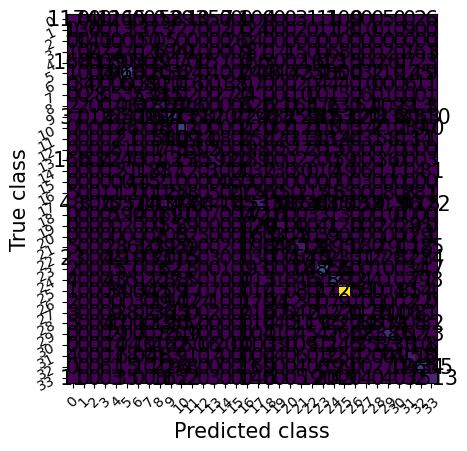

In [11]:
metric = MulticlassConfusionMatrix(num_classes=34).to(device)
result_CM_1 = metric(prediction_epoch_90,label_epoch_90)
fig_, ax_ = metric.plot(val=result_CM_1)

# The above plot is not clear so we need to plot it in a different way

* This code defines a function plot_confusion_matrix that generates a visual representation of a confusion matrix.
* A confusion matrix is used in the field of machine learning to summarize the performance of a classification algorithm by \
comparing the predicted classes with the true classes of a set of samples.

Here's a breakdown of the code and its components:

# Import Libraries:

* numpy (np alias): Used for numerical operations.
* matplotlib.pyplot (plt alias): Used for creating visualizations.
* torch: Used for tensor operations.

# plot_confusion_matrix Function:

The function takes several parameters:
* conf_matrix: The confusion matrix to be plotted.
* class_names: List of class names corresponding to the rows and columns of the matrix.
* normalize: If True, the values in the matrix are normalized to show proportions.
* title: Title of the plot.
* cmap: Colormap to be used for coloring the matrix.
* figsize: Size of the figure (plot) in inches.

# Normalize Confusion Matrix (Optional):

* If normalize is True, the conf_matrix is normalized by dividing each row by the sum of its elements.
This helps in visualizing proportions or percentages.

# Create the Plot:

* plt.figure(figsize=figsize): Initializes the figure with the specified size.
* plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap): Displays the confusion matrix as an image using the specified colormap.
* plt.title(title): Sets the title of the plot.
* plt.colorbar(): Adds a color bar to indicate the color scale of the matrix values.

# Set Axis Labels and Ticks:

* tick_marks = torch.arange(len(class_names)): Creates tick positions for the axes based on the number of classes.
* plt.xticks(tick_marks, class_names, rotation=90): Sets the tick labels on the x-axis to class names, rotated for better readability.
* plt.yticks(tick_marks, class_names): Sets the tick labels on the y-axis to class names.

# Add Matrix Values as Annotations:

* The nested loops iterate through each cell of the confusion matrix.
* plt.text(j, i, format(conf_matrix[i, j], fmt), ...): Adds text annotations to the cells. The text includes the formatted value from the matrix.
* The text color is determined based on a threshold (thresh). If the matrix value is greater than the threshold, the text color is white; otherwise, it's black.

# Set Labels and Layout:

* plt.ylabel('True label') and plt.xlabel('Predicted label'): Set labels for the y-axis and x-axis.
* plt.tight_layout(): Adjusts the layout to ensure the plot elements are well-spaced.

# Display the Plot:

* plt.show(): Finally, this function call displays the plot.

The resulting plot will show a color-coded confusion matrix with class labels, normalized values (if specified), and annotations indicating the actual values. <br>
This is a helpful visualization for understanding the performance of a classification algorithm in terms of how well it correctly predicts different classes.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_confusion_matrix(conf_matrix, class_names, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(8, 6)):
    if normalize:
        conf_matrix = conf_matrix.float() / conf_matrix.sum(dim=1, keepdim=True)

    plt.figure(figsize=figsize)  # Increase the figsize parameter here
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = torch.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    # Sets the threshold : Maximum value/ 2
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

In [13]:
class_names =  ['closing_bottle',
  'closing_door_inside',
  'closing_door_outside',
  'closing_laptop',
  'drinking',
  'eating',
  'entering_car',
  'exiting_car',
  'fastening_seat_belt',
  'fetching_an_object',
  'interacting_with_phone',
  'looking_or_moving_around (e.g. searching)',
  'opening_backpack',
  'opening_bottle',
  'opening_door_inside',
  'opening_door_outside',
  'opening_laptop',
  'placing_an_object',
  'preparing_food',
  'pressing_automation_button',
  'putting_laptop_into_backpack',
  'putting_on_jacket',
  'putting_on_sunglasses',
  'reading_magazine',
  'reading_newspaper',
  'sitting_still',
  'taking_laptop_from_backpack',
  'taking_off_jacket',
  'taking_off_sunglasses',
  'talking_on_phone',
  'unfastening_seat_belt',
  'using_multimedia_display',
  'working_on_laptop',
  'writing']

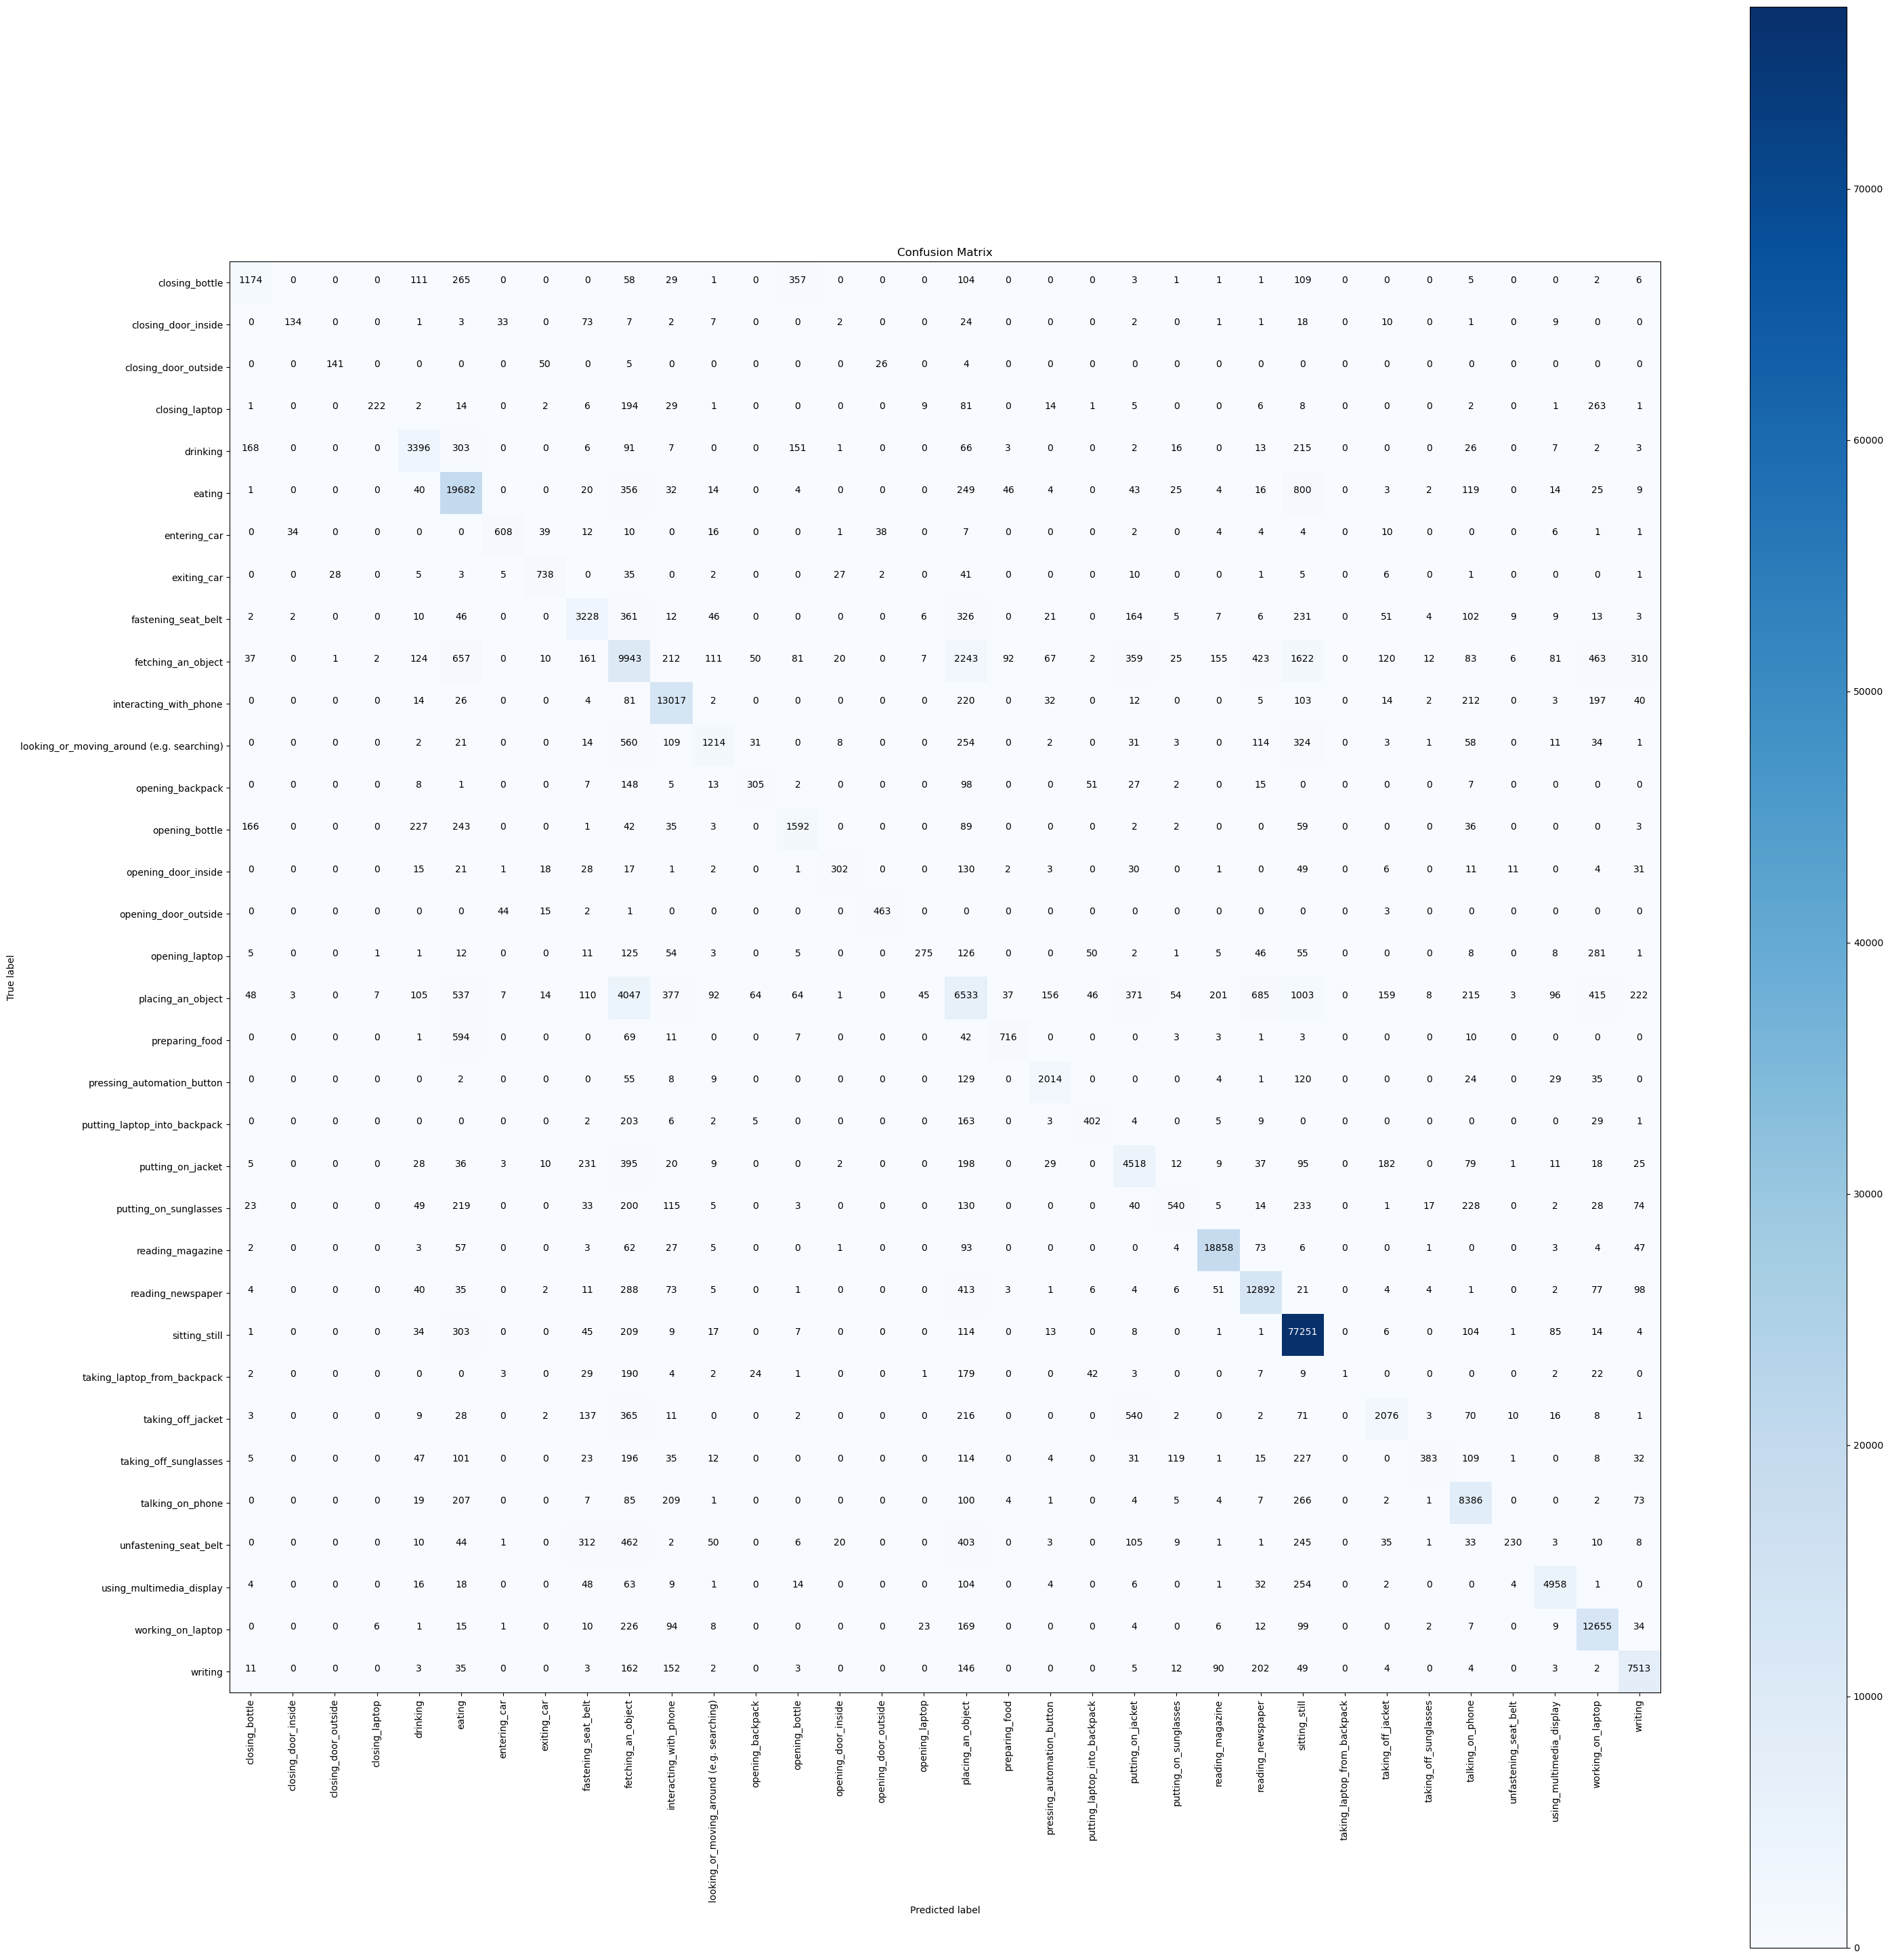

In [14]:
# Plotting the confusion matrix
conf_matrix = result_CM_1.cpu()
plot_confusion_matrix(conf_matrix, class_names, normalize=False, figsize=(30, 30))

# Confusion matrix with Sum of rows, columns and diagonal

In [73]:
conf_matrix = result_CM_1.cpu()
combined_matrix = torch.zeros((conf_matrix.shape[0]+1, conf_matrix.shape[1]+1))

combined_matrix[:conf_matrix.shape[0], :conf_matrix.shape[1]] = conf_matrix
print(f"The shape of the sliced matrix {combined_matrix[:-1, :-1].shape}")
row_sums = combined_matrix[:-1, :-1].sum(dim=1)
col_sums = combined_matrix[:-1, :-1].sum(dim=0)
diag_sum = torch.diag(combined_matrix[:-1, :-1]).sum()
sum_r_sum = row_sums.sum()
sum_c_sum = col_sums.sum()
print(f" The sum of all rows {row_sums}")
print(f" The sum of all cols {col_sums}")
print(f" The sum of sum of rows {sum_r_sum}")
print(f" The sum of sum of cols {sum_c_sum}")
print(f" The sum of diagonal of cf_matrix {diag_sum}")

The shape of the sliced matrix torch.Size([34, 34])
 The sum of all rows tensor([ 2227.,   328.,   226.,   862.,  4476., 21508.,   797.,   910.,  4664.,
        17479., 13984.,  2795.,   689.,  2500.,   684.,   528.,  1075., 15725.,
         1460.,  2430.,   834.,  5953.,  1959., 19249., 14042., 78227.,   521.,
         3572.,  1463.,  9383.,  1994.,  5539., 13381.,  8401.])
 The sum of all cols tensor([1.6620e+03, 1.7300e+02, 1.7000e+02, 2.3800e+02, 4.3210e+03, 2.3528e+04,
        7.0600e+02, 9.0000e+02, 4.5770e+03, 1.9311e+04, 1.4706e+04, 1.6550e+03,
        4.7900e+02, 2.3010e+03, 3.8500e+02, 5.2900e+02, 3.6600e+02, 1.3308e+04,
        9.0300e+02, 2.3710e+03, 6.0000e+02, 6.3370e+03, 8.4600e+02, 1.9418e+04,
        1.4642e+04, 8.3554e+04, 1.0000e+00, 2.6970e+03, 4.4100e+02, 9.9410e+03,
        2.7600e+02, 5.3680e+03, 1.4613e+04, 8.5420e+03])
 The sum of sum of rows 259865.0
 The sum of sum of cols 259865.0
 The sum of diagonal of cf_matrix 216360.0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_confusion_matrix(conf_matrix, class_names, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(10, 8)):
    if normalize:
        conf_matrix = conf_matrix.float() / conf_matrix.sum(dim=1, keepdim=True)

    plt.figure(figsize=figsize)
    
    # Create a new matrix to hold the confusion matrix and sums
    combined_matrix = torch.zeros((conf_matrix.shape[0]+1, conf_matrix.shape[1]+1))
    combined_matrix[:conf_matrix.shape[0], :conf_matrix.shape[1]] = conf_matrix
    
    # combined_matrix[:-1, :-1]: This part of the code slices the combined_matrix tensor to exclude the last row and last column
    # Sliced_Matrix : 34 x 34
    # dim=1 means that the sum is calculated along each row of the sliced matrix
    row_sums = combined_matrix[:-1, :-1].sum(dim=1)
    col_sums = combined_matrix[:-1, :-1].sum(dim=0)
    diag_sum = torch.diag(combined_matrix[:-1, :-1]).sum()
    
    # Replace the last element in each row and column with the respective sums
    combined_matrix[:-1, -1] = row_sums
    combined_matrix[-1, :-1] = col_sums
    combined_matrix[-1, -1] = diag_sum

    plt.imshow(combined_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = torch.arange(len(class_names) + 1)
    plt.xticks(tick_marks, class_names + ['Sum'], rotation=90)
    plt.yticks(tick_marks, class_names + ['Sum'])

    fmt = '.2f' if normalize else '.0f'  # Use '.0f' for integers
    threshold = combined_matrix.max() / 2.
    
    for i in range(combined_matrix.shape[0]):
        for j in range(combined_matrix.shape[1]):
            plt.text(j, i, format(combined_matrix[i, j], fmt), horizontalalignment="center", 
                     color="white" if combined_matrix[i, j] > threshold else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

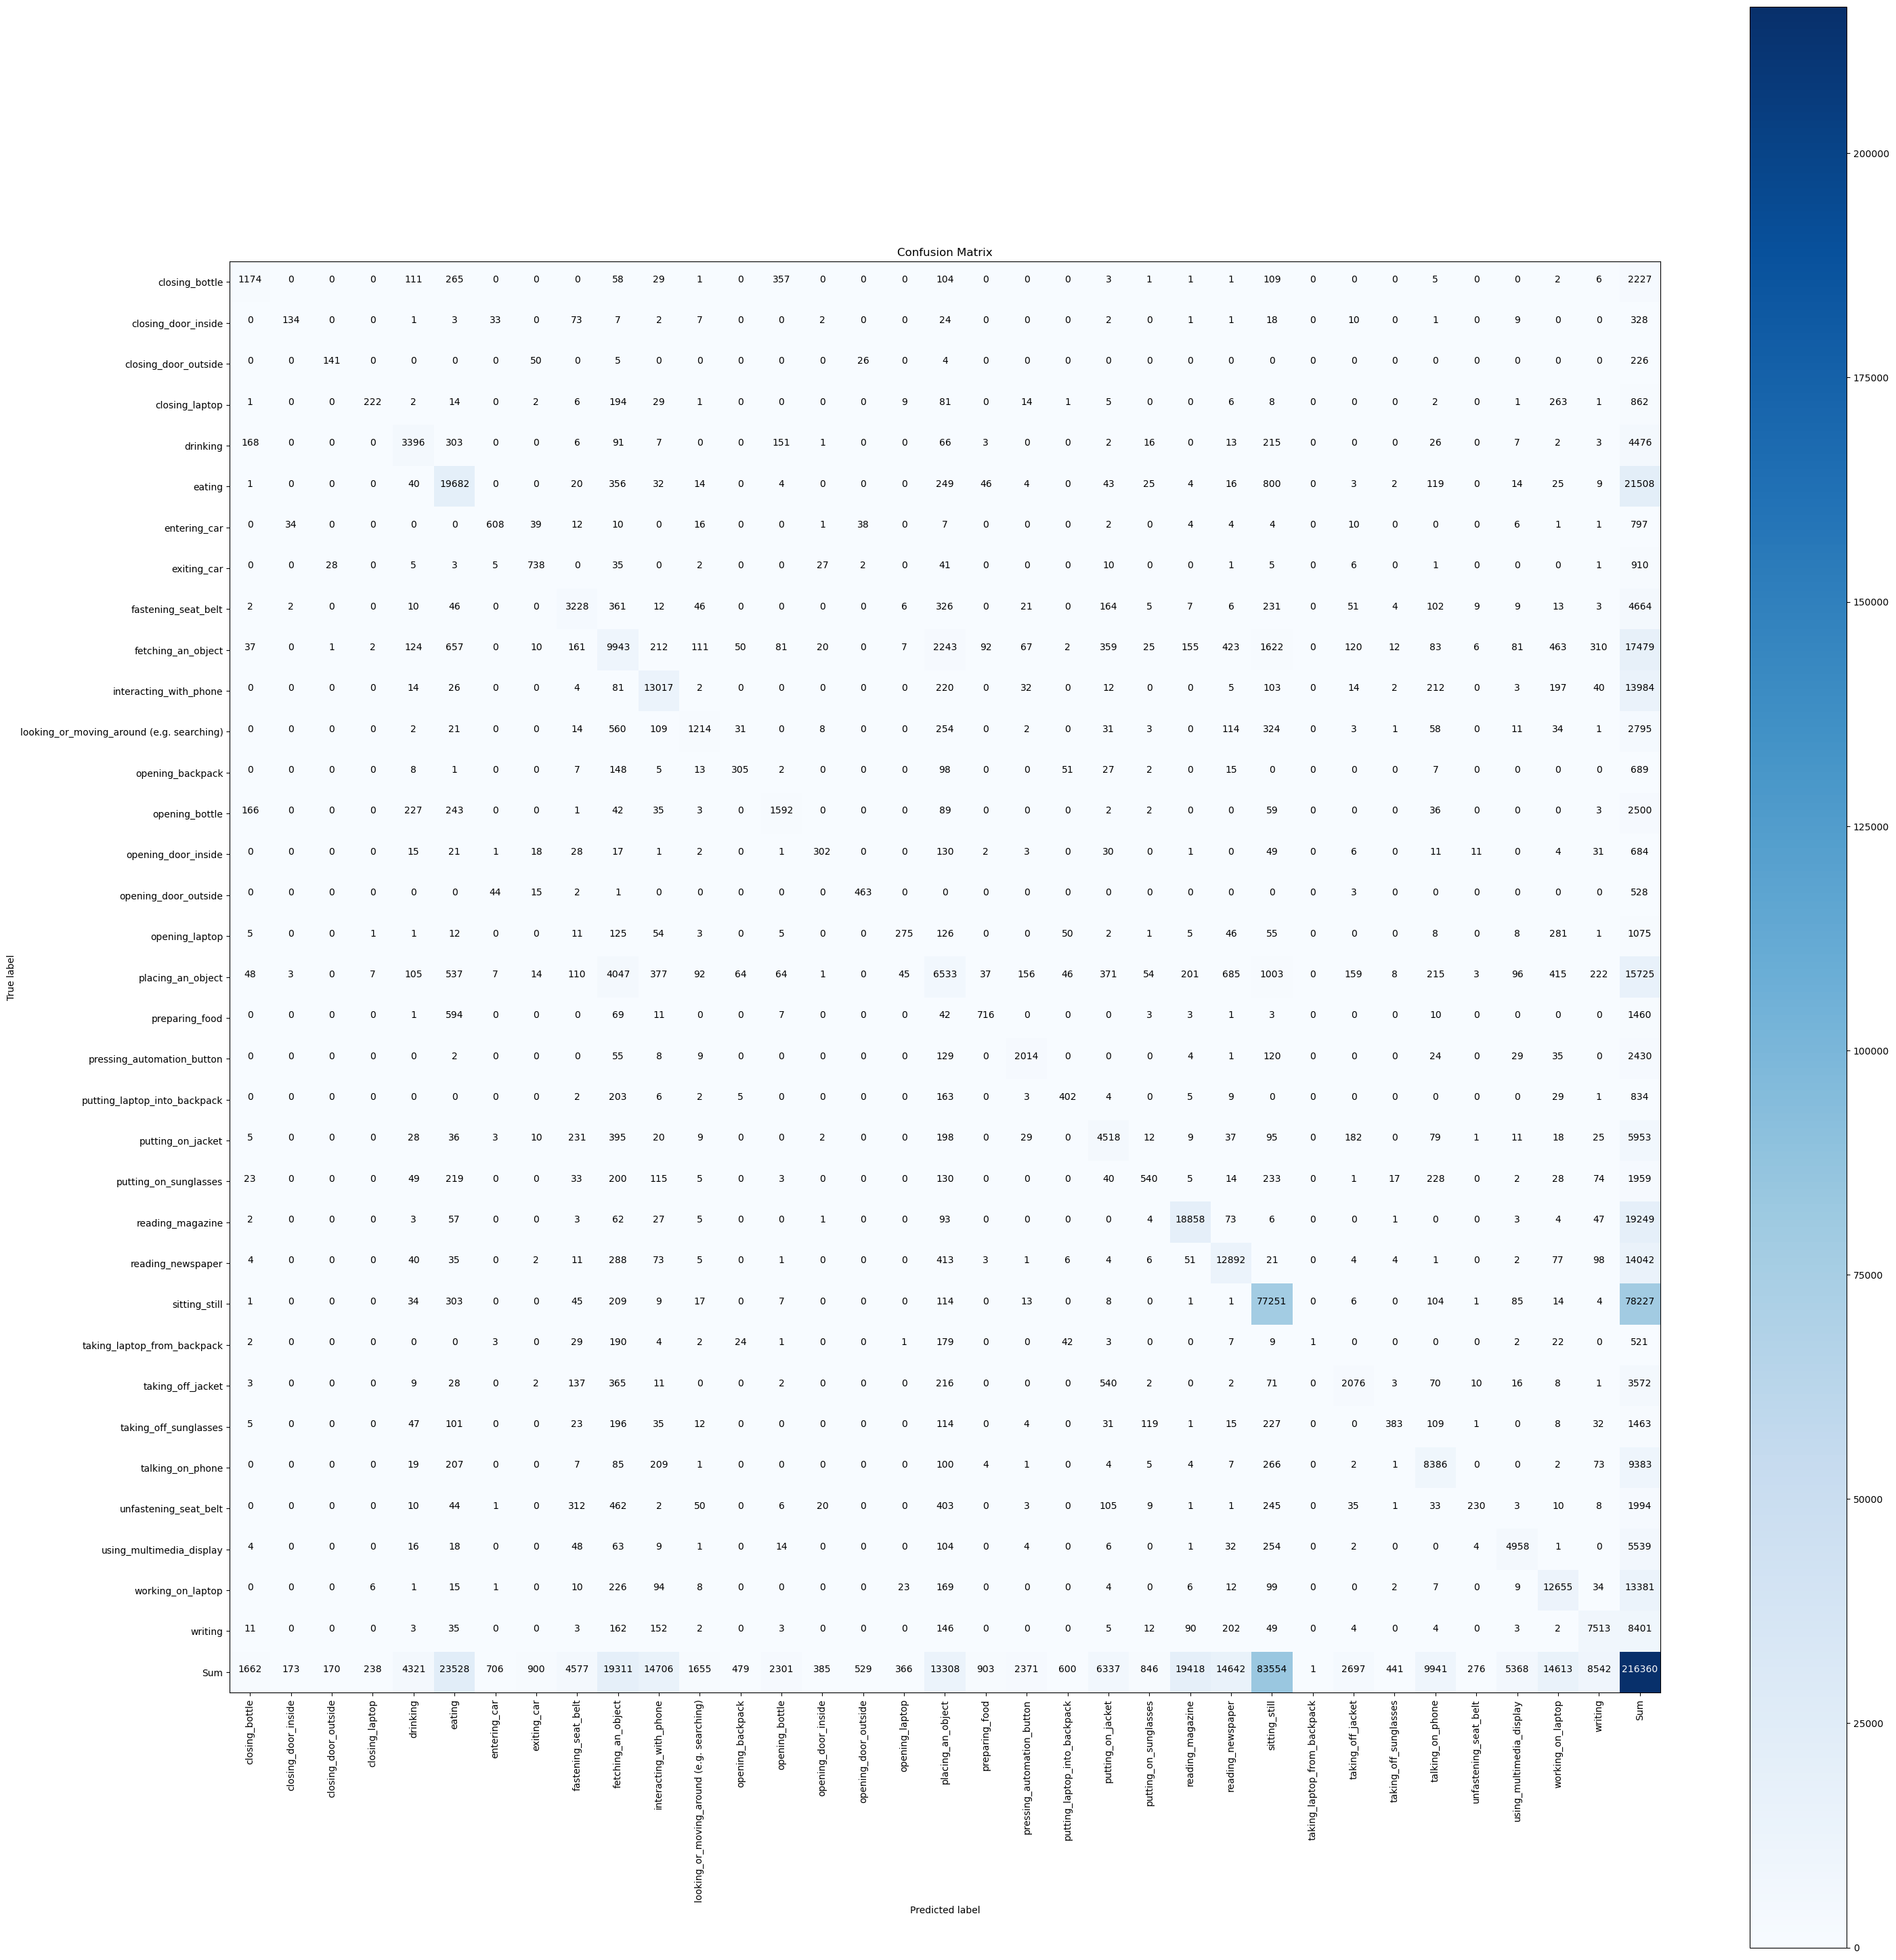

In [75]:
# Plotting the confusion matrix
conf_matrix = result_CM_1.cpu()
plot_confusion_matrix(conf_matrix, class_names, normalize=False, figsize=(30, 30))

# Values of the Metrics Calculation
* TP for each class: [753, 13, 2, 0, 2672, 18540, 512, 636, 2457, 9185, 12383, 662, 84, 947, 57, 411, 10, 5125, 137, 1832, 125, 4046, 89, 18596, 12529, 77156, 0, 1543, 112, 7440, 2, 4771, 12315, 6644]

* TN for each class: [257130, 259536, 259639, 259003, 254170, 232152, 258959, 258678, 253847, 231006, 243286, 256751, 259107, 256808, 259154, 259221, 258789, 236995, 258347, 256955, 258955, 251539, 257853, 239693, 243464, 170427, 259344, 255634, 258392, 247503, 257871, 253758, 243526, 249974]

* FP for each class: [508, 1, 0, 0, 1219, 6205, 109, 277, 1354, 11380, 2595, 319, 69, 557, 27, 116, 1, 7145, 58, 480, 76, 2373, 53, 923, 2359, 11211, 0, 659, 10, 2979, 0, 568, 2958, 1490]

* FN for each class: [1474, 315, 224, 862, 1804, 2968, 285, 274, 2207, 8294, 1601, 2133, 605, 1553, 627, 117, 1065, 10600, 1323, 598, 709, 1907, 1870, 653, 1513, 1071, 521, 2029, 1351, 1943, 1992, 768, 1066, 1757]

* Sensitivity for each class: [0.33812302350997925, 0.03963414579629898, 0.008849557489156723, 0.0, 0.5969615578651428, 0.862004816532135, 0.6424090266227722, 0.6989011168479919, 0.5268010497093201, 0.5254877209663391, 0.8855119943618774, 0.2368515133857727, 0.12191581726074219, 0.37880000472068787, 0.0833333358168602, 0.7784090638160706, 0.009302325546741486, 0.3259141445159912, 0.09383561462163925, 0.7539094686508179, 0.14988009631633759, 0.6796573400497437, 0.04543134197592735, 0.966076135635376, 0.8922517895698547, 0.9863090515136719, 0.0, 0.43197089433670044, 0.07655502110719681, 0.7929233908653259, 0.001003009034320712, 0.8613468408584595, 0.9203348159790039, 0.7908582091331482]

* Specificity for each class: [0.9980282187461853, 0.9999961256980896, 1.0, 1.0, 0.9952268600463867, 0.9739676117897034, 0.9995792508125305, 0.9989303350448608, 0.9946943521499634, 0.9530500769615173, 0.9894461035728455, 0.9987590909004211, 0.9997337460517883, 0.9978357553482056, 0.9998958110809326, 0.9995527267456055, 0.9999961256980896, 0.9707340002059937, 0.9997755289077759, 0.9981354475021362, 0.9997066259384155, 0.9906542301177979, 0.9997944831848145, 0.9961640238761902, 0.9904036521911621, 0.938278317451477, 1.0, 0.9974287152290344, 0.9999613165855408, 0.988106906414032, 1.0, 0.9977666735649109, 0.9879992008209229, 0.9940747022628784]

* Balanced Accuracy per class: [tensor(0.6681, device='cuda:0'), tensor(0.5198, device='cuda:0'), tensor(0.5044, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.7961, device='cuda:0'), tensor(0.9180, device='cuda:0'), tensor(0.8210, device='cuda:0'), tensor(0.8489, device='cuda:0'), tensor(0.7607, device='cuda:0'), tensor(0.7393, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.6178, device='cuda:0'), tensor(0.5608, device='cuda:0'), tensor(0.6883, device='cuda:0'), tensor(0.5416, device='cuda:0'), tensor(0.8890, device='cuda:0'), tensor(0.5046, device='cuda:0'), tensor(0.6483, device='cuda:0'), tensor(0.5468, device='cuda:0'), tensor(0.8760, device='cuda:0'), tensor(0.5748, device='cuda:0'), tensor(0.8352, device='cuda:0'), tensor(0.5226, device='cuda:0'), tensor(0.9811, device='cuda:0'), tensor(0.9413, device='cuda:0'), tensor(0.9623, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.7147, device='cuda:0'), tensor(0.5383, device='cuda:0'), tensor(0.8905, device='cuda:0'), tensor(0.5005, device='cuda:0'), tensor(0.9296, device='cuda:0'), tensor(0.9542, device='cuda:0'), tensor(0.8925, device='cuda:0')]

* Balanced Accuracy All: tensor(0.7243, device='cuda:0')

In [15]:
import torch

predicted_labels = torch.tensor(predictions_90).to(device)
true_labels = torch.tensor(labels_90).to(device)

# Calculate confusion matrix
metric = MulticlassConfusionMatrix(num_classes=34).to(device)
confusion_mat = metric(predicted_labels,true_labels)

class_names =  ['closing_bottle',
  'closing_door_inside',
  'closing_door_outside',
  'closing_laptop',
  'drinking',
  'eating',
  'entering_car',
  'exiting_car',
  'fastening_seat_belt',
  'fetching_an_object',
  'interacting_with_phone',
  'looking_or_moving_around (e.g. searching)',
  'opening_backpack',
  'opening_bottle',
  'opening_door_inside',
  'opening_door_outside',
  'opening_laptop',
  'placing_an_object',
  'preparing_food',
  'pressing_automation_button',
  'putting_laptop_into_backpack',
  'putting_on_jacket',
  'putting_on_sunglasses',
  'reading_magazine',
  'reading_newspaper',
  'sitting_still',
  'taking_laptop_from_backpack',
  'taking_off_jacket',
  'taking_off_sunglasses',
  'talking_on_phone',
  'unfastening_seat_belt',
  'using_multimedia_display',
  'working_on_laptop',
  'writing']
num_classes = len(class_names)
# Initialize lists to store TP, TN, FP, FN, specificity, and sensitivity for each class
tp_list = []
tn_list = []
fp_list = []
fn_list = []
specificity_list = []
sensitivity_list = []
balanced_accuracy_list = []

# Calculate TP, TN, FP, FN, specificity, and sensitivity for each class
for i in range(num_classes):
    tp = confusion_mat[i, i]
    fn = torch.sum(confusion_mat[i, :]) - tp
    fp = torch.sum(confusion_mat[:, i]) - tp
    tn = torch.sum(confusion_mat) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    tp_list.append(tp.item())
    tn_list.append(tn.item())
    fp_list.append(fp.item())
    fn_list.append(fn.item())
    sensitivity_list.append(sensitivity.item())
    specificity_list.append(specificity.item())

    # Calculate balanced accuracy for each class
    balanced_accuracy = (sensitivity + specificity) / 2
    balanced_accuracy_list.append(balanced_accuracy)

# Calculate balanced accuracy
balanced_accuracy_all = sum(balanced_accuracy_list) / num_classes

print("TP for each class:", tp_list)
print("TN for each class:", tn_list)
print("FP for each class:", fp_list)
print("FN for each class:", fn_list)
print("Sensitivity for each class:", sensitivity_list)
print("Specificity for each class:", specificity_list)
print("Balanced Accuracy per class:", balanced_accuracy_list)
print("Balanced Accuracy All:", balanced_accuracy_all)


TP for each class: [1174, 134, 141, 222, 3396, 19682, 608, 738, 3228, 9943, 13017, 1214, 305, 1592, 302, 463, 275, 6533, 716, 2014, 402, 4518, 540, 18858, 12892, 77251, 1, 2076, 383, 8386, 230, 4958, 12655, 7513]
TN for each class: [257150, 259498, 259610, 258987, 254464, 234511, 258970, 258793, 253852, 233018, 244192, 256629, 259002, 256656, 259098, 259271, 258699, 237365, 258218, 257078, 258833, 252093, 257600, 240056, 244073, 175335, 259344, 255672, 258344, 248927, 257825, 253916, 244526, 250435]
FP for each class: [488, 39, 29, 16, 925, 3846, 98, 162, 1349, 9368, 1689, 441, 174, 709, 83, 66, 91, 6775, 187, 357, 198, 1819, 306, 560, 1750, 6303, 0, 621, 58, 1555, 46, 410, 1958, 1029]
FN for each class: [1053, 194, 85, 640, 1080, 1826, 189, 172, 1436, 7536, 967, 1581, 384, 908, 382, 65, 800, 9192, 744, 416, 432, 1435, 1419, 391, 1150, 976, 520, 1496, 1080, 997, 1764, 581, 726, 888]
Sensitivity for each class: [0.5271666049957275, 0.4085365831851959, 0.6238937973976135, 0.2575406134128

In [16]:
class_names = [
    'closing_bottle',
    'closing_door_inside',
    'closing_door_outside',
    'closing_laptop',
    'drinking',
    'eating',
    'entering_car',
    'exiting_car',
    'fastening_seat_belt',
    'fetching_an_object',
    'interacting_with_phone',
    'looking_or_moving_around (e.g. searching)',
    'opening_backpack',
    'opening_bottle',
    'opening_door_inside',
    'opening_door_outside',
    'opening_laptop',
    'placing_an_object',
    'preparing_food',
    'pressing_automation_button',
    'putting_laptop_into_backpack',
    'putting_on_jacket',
    'putting_on_sunglasses',
    'reading_magazine',
    'reading_newspaper',
    'sitting_still',
    'taking_laptop_from_backpack',
    'taking_off_jacket',
    'taking_off_sunglasses',
    'talking_on_phone',
    'unfastening_seat_belt',
    'using_multimedia_display',
    'working_on_laptop',
    'writing'
]

balanced_accuracy_list = balanced_accuracy_list

for i in range(len(class_names)):
    print(f"Class Name: {class_names[i]}, Balanced Accuracy Value: {balanced_accuracy_list[i]* 100}%")


Class Name: closing_bottle, Balanced Accuracy Value: 76.26362609863281%
Class Name: closing_door_inside, Balanced Accuracy Value: 70.41931915283203%
Class Name: closing_door_outside, Balanced Accuracy Value: 81.1891098022461%
Class Name: closing_laptop, Balanced Accuracy Value: 62.87394332885742%
Class Name: drinking, Balanced Accuracy Value: 87.75456237792969%
Class Name: eating, Balanced Accuracy Value: 94.94828796386719%
Class Name: entering_car, Balanced Accuracy Value: 88.1241226196289%
Class Name: exiting_car, Balanced Accuracy Value: 90.51817321777344%
Class Name: fastening_seat_belt, Balanced Accuracy Value: 84.3411865234375%
Class Name: fetching_an_object, Balanced Accuracy Value: 76.51025390625%
Class Name: interacting_with_phone, Balanced Accuracy Value: 96.19902038574219%
Class Name: looking_or_moving_around (e.g. searching), Balanced Accuracy Value: 71.63157653808594%
Class Name: opening_backpack, Balanced Accuracy Value: 72.09996032714844%
Class Name: opening_bottle, Bala

In [17]:
def calculate_balanced_accuracy(y_pred, y_true, num_classes, epsilon=1e-9):
    """
    Calculates the balanced accuracy score.
    
    Args:
        y_pred (torch.Tensor): Predicted labels.
        y_true (torch.Tensor): True labels.
        num_classes (int): Number of classes in the dataset.
        epsilon (float): A small value to add to denominators to prevent division by zero.
        
    Returns:
        float: Balanced accuracy score.
    """
    # Create confusion matrix
    confusion_matrix = torch.zeros(num_classes, num_classes, device=y_pred.device)
    for t, p in zip(y_true.view(-1), y_pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # Calculate recall for each class, adding epsilon to avoid division by zero
    recall = torch.diag(confusion_matrix) / (confusion_matrix.sum(1) + epsilon)

    # Calculate balanced accuracy
    balanced_accuracy = recall.mean().item()

    return balanced_accuracy

predicted_labels = torch.tensor(predictions_90).to(device)
true_labels = torch.tensor(labels_90).to(device)

calculate_balanced_accuracy(predicted_labels, true_labels, 34)

0.6197174191474915

In [ ]:
from sklearn.metrics import balanced_accuracy_score

predicted_labels = torch.tensor(predictions_90).to(device)
true_labels = torch.tensor(labels_90).to(device)

In [79]:
balanced_accuracy_list = [score.cpu().numpy() for score in balanced_accuracy_list]

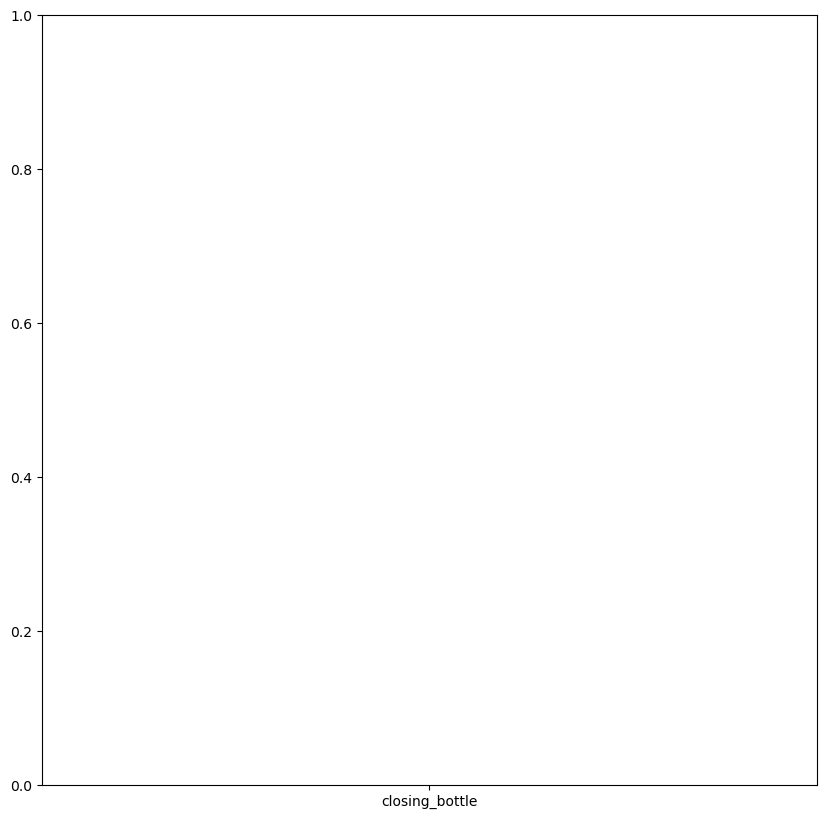

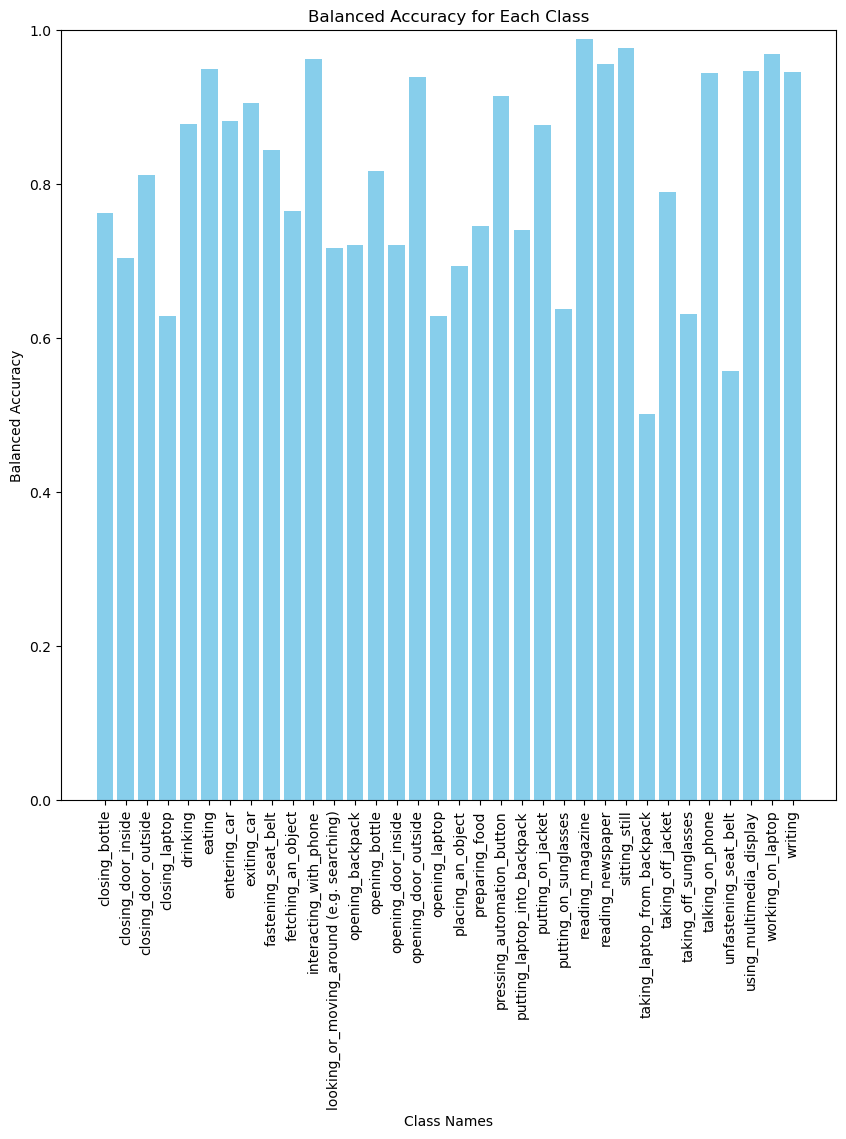

In [80]:
import matplotlib.pyplot as plt

# List of class labels (0 to num_classes-1)
# class_labels = list(range(num_classes))
class_labels = list(class_names)
# Move balanced_accuracy_list tensors to CPU and convert to NumPy arrays
balanced_accuracy_list = [score for score in balanced_accuracy_list]

# Create a bar plot for balanced accuracy for each class
plt.figure(figsize=(10, 10))
plt.bar(class_labels, balanced_accuracy_list, color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy for Each Class')
plt.xticks(class_labels, rotation=90)
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for balanced accuracy
plt.show()


In [37]:
# specificity_list = [score.cpu().numpy() for score in specificity_list]
# sensitivity_list = [score.cpu().numpy() for score in sensitivity_list]

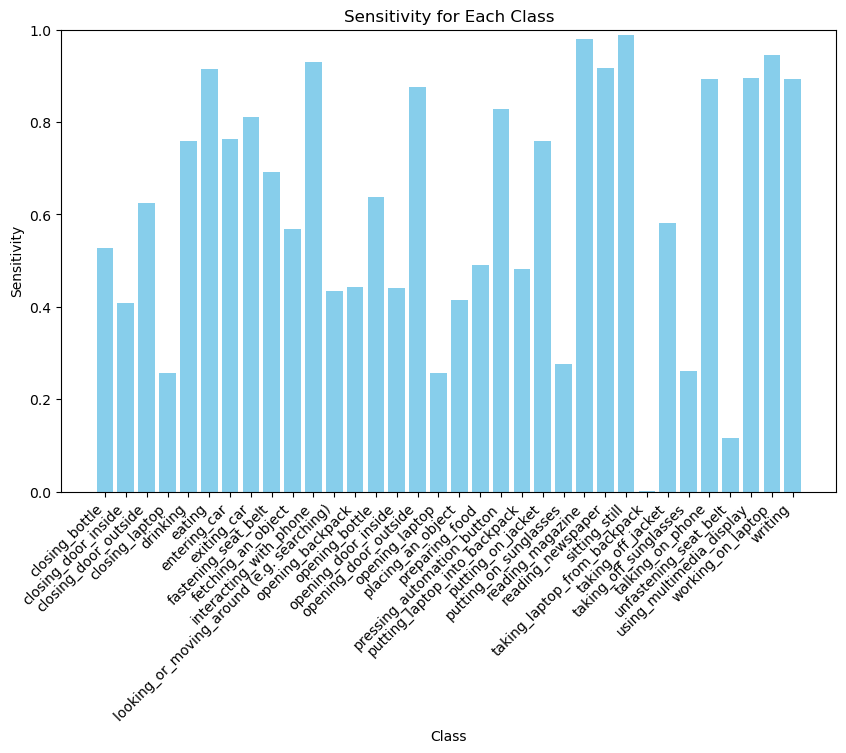

In [81]:
import matplotlib.pyplot as plt

# List of class labels (0 to num_classes-1)
class_labels = list(range(len(class_names)))

# Create a bar plot for sensitivity for each class
plt.figure(figsize=(10, 6))
plt.bar(class_labels, sensitivity_list, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Sensitivity')
plt.title('Sensitivity for Each Class')
plt.xticks(class_labels, class_names, rotation=45, ha="right")
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for sensitivity
plt.show()


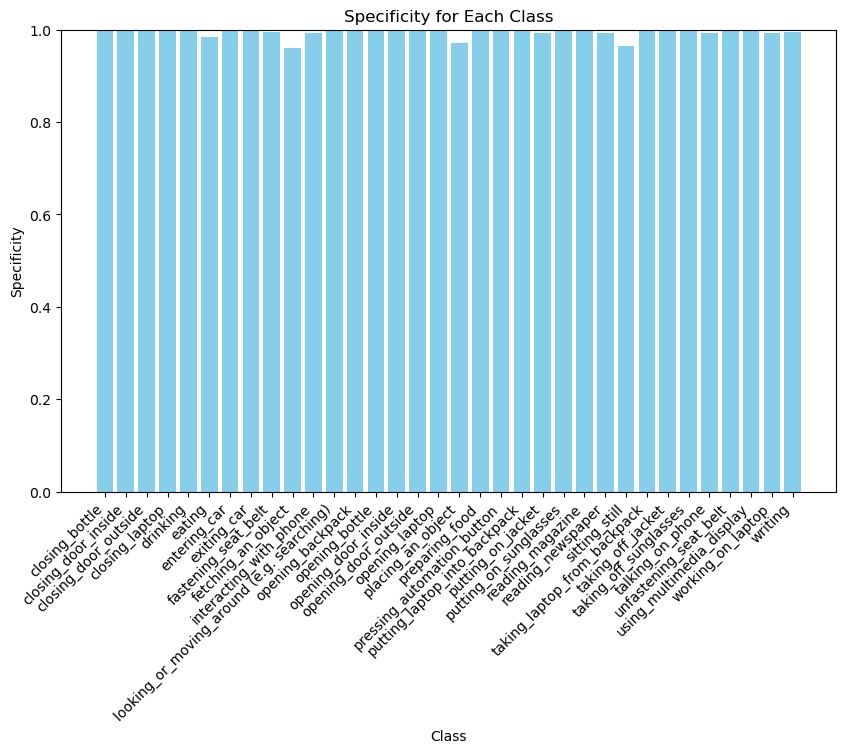

In [82]:
import matplotlib.pyplot as plt
# List of class labels (0 to num_classes-1)
class_labels = list(range(len(class_names)))

# Create a bar plot for sensitivity for each class
plt.figure(figsize=(10, 6))
plt.bar(class_labels, specificity_list, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Specificity')
plt.title('Specificity for Each Class')
plt.xticks(class_labels, class_names, rotation=45, ha="right")
plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for specificity
plt.show()




# Conclusion (Rough)
Based on the provided training and validation results for the Vision Transformer 16 Base model trained on the Drive and Act dataset with RGB images using a batch size of 512 and SGD+CosineAnnealing learning rate schedule, here is a summary:

## Training Loss and Accuracy:

* The training loss starts at a relatively high value of around 2.2743 at epoch 0 and gradually decreases over the epochs.
The training accuracy starts at approximately 39.69% at epoch 0 and steadily increases with each epoch.
Validation Loss and Accuracy:

* The validation loss starts at a high value of around 3.7590 at epoch 0 and, similar to the training loss, fluctuates but generally increases over time.
The validation accuracy starts low at approximately 9.31% at epoch 0 and also fluctuates but remains low throughout the training process.
Observations:

* The training loss decreases, indicating that the model is learning from the training data, but the validation loss increases, suggesting that the model may be overfitting to the training data.
The training accuracy consistently improves, indicating that the model is fitting the training data well.
The validation accuracy remains low and does not improve significantly, indicating that the model is not generalizing well to unseen data.
## Conclusion:

* The provided training results suggest that the model is learning the training data but is not performing well on the validation data.
It's possible that the model is overfitting, and regularization techniques or adjustments to the model architecture may be needed to improve generalization.
Further analysis, such as examining the learning rate schedule, data preprocessing, and model architecture, may be necessary to address the observed issues and improve overall performance.
Additionally, monitoring training for more epochs or using early stopping techniques to prevent overfitting may be considered.
* Overall, the training process indicates that there is room for improvement in the model's ability to generalize to unseen data.